# **Statevector Simulator Challenge**
---

### **Description**

So far, our statevector simulator has only had very basic capabilities. In this activity, we will be focusing on expanding the capabilities of the statevector simulator.

<br>

### **Lab Structure**
**Part 1**: [Multi-Qubit Circuits](#p1)

**Part 2**: [Putting it All Together](#p2)

<br>

### **Goals**
By the end of this activity, you will:
* Modify the Statevector Simulator to take a `QuantumCircuit` object as an input
* Process gates we have never seen before using Qiskit's `Operator` class
* Implement miscellaneous features that require a deep understanding of specific libraries and objects

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

Notice how short this import block is! So far, we have been importing specific functions, so we don't have to type out the full function name. You are free to figure out how to do this for the functions you need! If you choose not to, note that you will have to refer to functions by their full names (for example, `QuantumCircuit()` will become `qiskit.QuantumCircuit()`). To find the full name of a function, look up the name of the function in the documentation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

<a name="p1"></a>

---
## **Part 1: Adding Remaining Gates**
This section will focus on filling out our library of quantum gates in our statevector simulator. Define the below gates using arrays.

####**The Y Gate**

In [ ]:
Y = np.array([[0, -1j], [1j, 0]]
                  )
Y

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

####**The CNOT Gate**

In [ ]:
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
                  )
CNOT

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

####**The Rotational X Gate**

In [ ]:
# COMPLETE THIS CODE
def RX(theta):
  return np.array([[np.cos(theta/2), -1j *np.sin(theta/2)], [-1j *np.sin(theta/2), np.cos(theta/2)]]
                  )
print(RX(np.pi))


[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]


####**The Rotational Y Gate**

In [ ]:
# COMPLETE THIS CODE
def RY(theta):
  return np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]]
                  )
print(RY(np.pi))

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


-1.0


####**The Rotational Z Gate**

In [ ]:
# COMPLETE THIS CODE
import cmath
def RZ(theta):
  return np.array([[cmath.exp(-1j * theta/2), 0], [0, cmath.exp(1j * theta/2)]]
                  )
print(RZ(np.pi))

[[6.123234e-17-1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]


<a name="p2"></a>

---
## **Part 2: Putting it All Together**
---

In [ ]:
I = np.array([[1, 0], [0, 1]]
                  )
X = np.array([[0, 1], [1, 0]]
                  )
Y = np.array([[0, -1j], [1j, 0]]
                  )
Z = np.array([[1, 0], [0, -1]]
                  )
H = 1/math.sqrt(2) * np.array([[1, 1], [1, -1]]
                  )
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

def RX(theta):
  theta = np.radians(theta)
  return np.array([[np.cos(theta/2), -1j *np.sin(theta/2)], [-1j *np.sin(theta/2), np.cos(theta/2)]])
def RY(theta):
  theta = np.radians(theta)
  return np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
def RZ(theta):
  theta = np.radians(theta)
  return np.array([[cmath.exp(-1j * theta/2), 0], [0, cmath.exp(1j * theta/2)]])

zero_state = np.array([1, 0])
one_state = np.array([0, 1])
plus_state = 1/math.sqrt(2) * np.array([1, 1])
minus_state = 1/math.sqrt(2) * np.array([1, -1])
i_state = 1/math.sqrt(2) * np.array([1, 1j])
minus_i_state = 1/math.sqrt(2) * np.array([1, -1j])

def probabilities(state_vector):
  probabilities = state_vector * np.conjugate(state_vector)
  return probabilities

def counts(shots, state_vector):
  counts = np.random.multinomial(shots, state_vector * np.conjugate(state_vector))
  return counts

def simulate(shots, state_vector, qubits):
  plt.bar(binary_labels(qubits), np.random.multinomial(shots, state_vector * np.conjugate(state_vector)))

  plt.xlabel('State')
  plt.ylabel('Count')
  plt.title('Histogram of Measurement Results')
  plt.show()

In [ ]:
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
H = 1/2**(1/2) * np.array([[1, 1], [1, -1]])
CNOT = np.array([[1,0,0,0], [0,1,0,0], [0,0,0,1], [0,0,1,0]])

def RX(angle):
  return np.array([[np.cos(radians(angle)/2), -1j * np.sin(radians(angle)/2)], [-1j * np.sin(radians(angle)/2), np.cos(radians(angle)/2)]])
def RY(angle):
  return np.array([[np.cos(radians(angle)/2), -np.sin(radians(angle)/2)], [np.sin(radians(angle)/2), np.cos(radians(angle)/2)]])
def RZ(angle):
  return np.array([[np.exp(-1j * radians(angle)/2), 0], [0, np.exp(1j * radians(angle)/2)]])

zero_state = np.array([1, 0])
one_state = np.array([0, 1])
plus_state = 1/(2)**(1/2) * np.array([1, 1])
minus_state = 1/(2)**(1/2) * np.array([1, -1])
i_state = 1/(2)**(1/2) * (zero_state + 1j * one_state)
minus_i_state = 1/(2)**(1/2) * (zero_state - 1j * one_state)

def probabilities(state_vector):
  probabilities = state_vector * np.conjugate(state_vector)
  return probabilities

def counts(shots, state_vector):
  counts = np.random.multinomial(shots, state_vector * np.conjugate(state_vector))
  return counts

def simulate(shots, state_vector, qubits):
  plt.bar(binary_labels(qubits), np.random.multinomial(shots, state_vector * np.conjugate(state_vector)))

  plt.xlabel('State')
  plt.ylabel('Count')
  plt.title('Histogram of Measurement Results')
  plt.show()

####**Single Qubit Quantum Circuit**
Create a quantum circuit with an H gate applied to a single qubit. Output the probabilities and simulate the results 100 times.

[0.5 0.5]


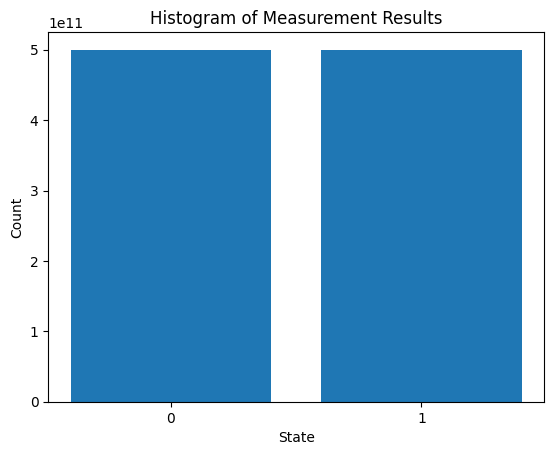

None


In [ ]:
# COMPLETE THIS CODE
print(probabilities(plus_state))
print(simulate(1000000000000, plus_state, 1))

####**Two Qubit Quantum Circuit**
Create a two quantum circuit with an H gate applied to each qubit. Output the probabilities and simulate the results 100 times.

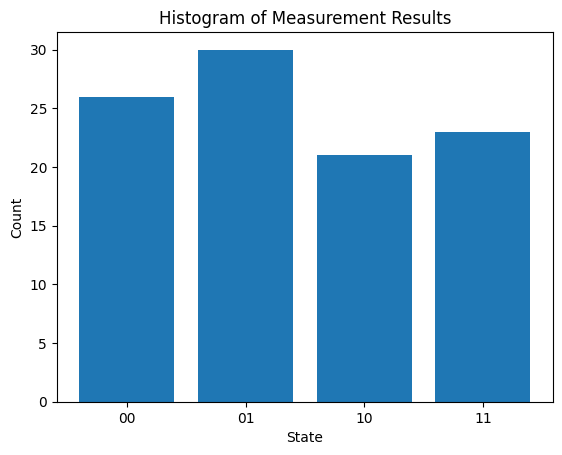

None


In [ ]:
# COMPLETE THIS CODE
two_qub_state = np.kron(plus_state, plus_state)
print(simulate(100, two_qub_state, 2))

####**Three Qubit Quantum Circuit**
Create a three qubit quantum circuit with an H gate applied to the first and third, and an X gate applied to the second. Output the probabilities and simulate the results 100 times.

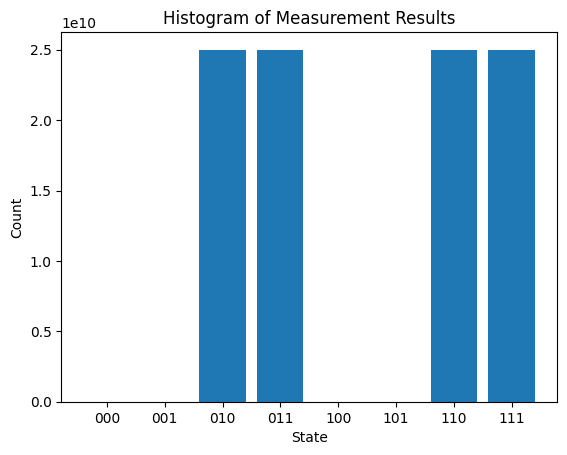

None


In [ ]:
# COMPLETE THIS CODE
three_qub_state = np.kron(np.kron(plus_state, one_state), plus_state)
print(simulate(100000000000, three_qub_state, 3))

#End of notebook
---
© 2024 The Coding School, All rights reserved